Importing the libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Loading the dataset "House_Rent_Dataset"

In [2]:
data= pd.read_csv('House_Rent_Dataset.csv')
data.head()

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2022-05-18,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2022-05-13,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2022-05-16,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2022-07-04,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2022-05-09,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner


No Null Values found

In [3]:
data.isnull().sum()

Posted On            0
BHK                  0
Rent                 0
Size                 0
Floor                0
Area Type            0
Area Locality        0
City                 0
Furnishing Status    0
Tenant Preferred     0
Bathroom             0
Point of Contact     0
dtype: int64

Identifying discrete, continuous, and categorical features

In [4]:
numeric_col = [col for col in data.columns if data[col].dtypes!='O']
numeric_col

['BHK', 'Rent', 'Size', 'Bathroom']

In [5]:
discrete_col = [col for col in numeric_col if len(data[col].unique())<25]
discrete_col

['BHK', 'Bathroom']

In [6]:
continuous_col=[col for col in numeric_col if col not in discrete_col]
continuous_col

['Rent', 'Size']

In [7]:
categorical_col=[col for col in data.columns if col not in numeric_col]
categorical_col

['Posted On',
 'Floor',
 'Area Type',
 'Area Locality',
 'City',
 'Furnishing Status',
 'Tenant Preferred',
 'Point of Contact']

Categorical Features and the no of unique categories.

In [8]:
for col in categorical_col:
    print(col , "------", len(data[col].unique()))

Posted On ------ 81
Floor ------ 480
Area Type ------ 3
Area Locality ------ 2235
City ------ 6
Furnishing Status ------ 3
Tenant Preferred ------ 3
Point of Contact ------ 3


Exploratory Data Analysis

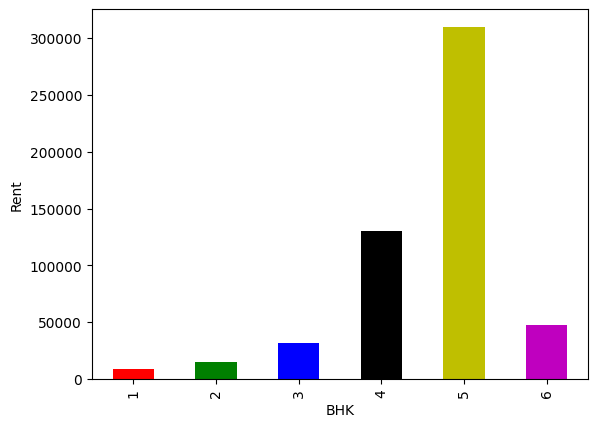

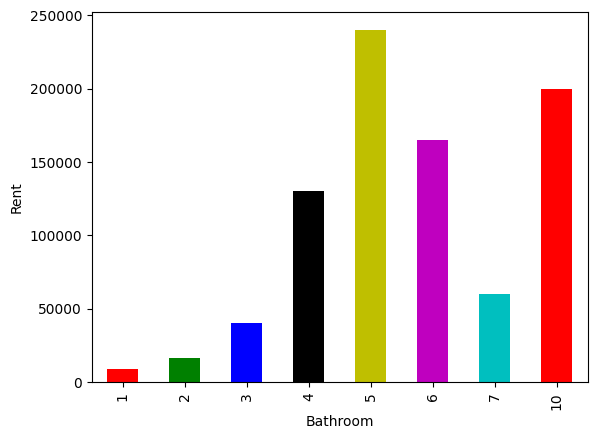

In [9]:
for col in discrete_col:
    data1= data.copy()
    data1.groupby(col)['Rent'].median().plot.bar(color=list('rgbkymc'))
    plt.xlabel(col)
    plt.ylabel('Rent')
    plt.show()

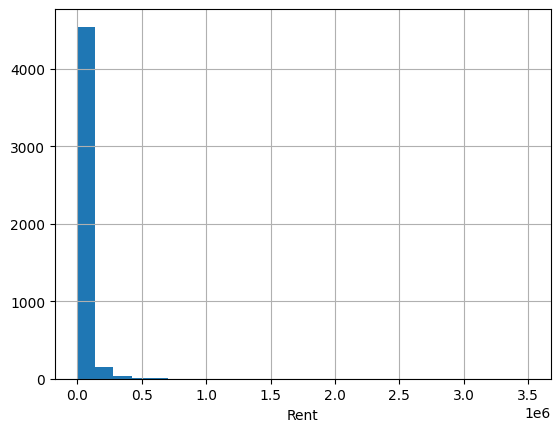

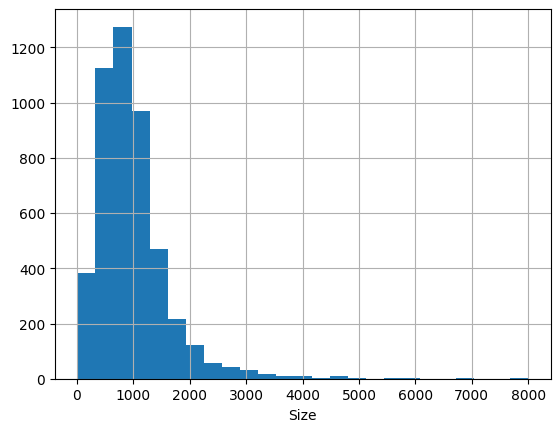

In [10]:
for col in continuous_col:
    data[col].hist(bins=25)
    plt.xlabel(col)
    plt.show()

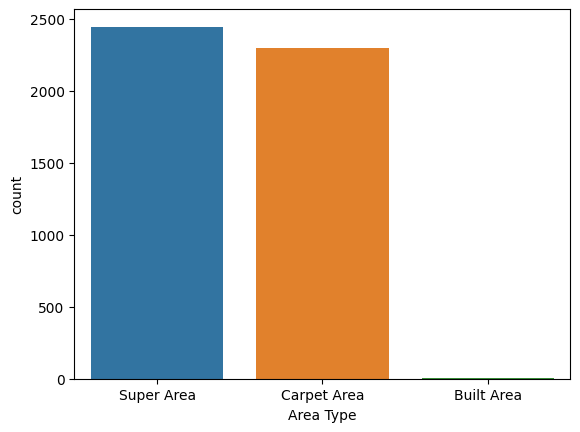

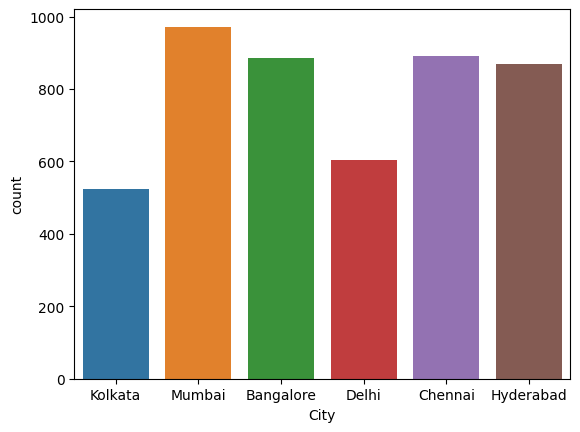

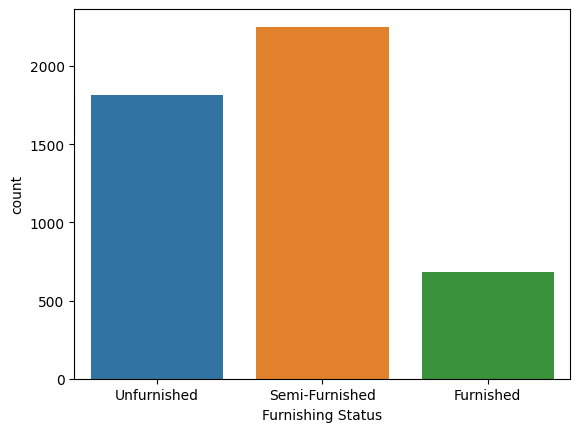

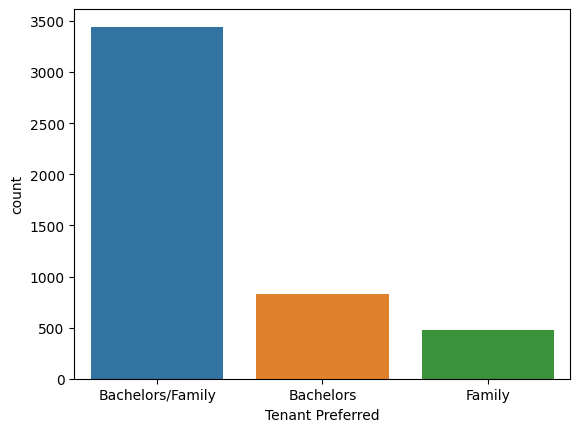

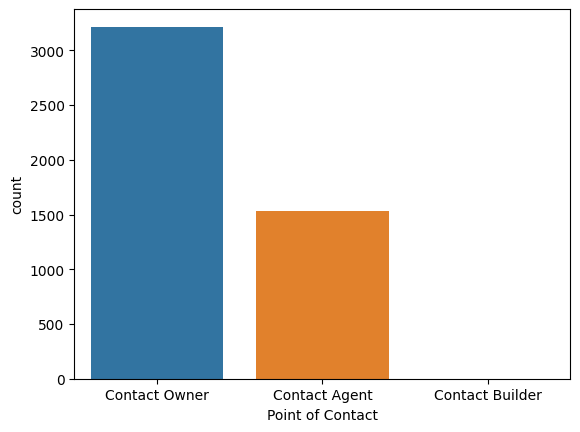

In [11]:
for col in categorical_col:
    if len(data[col].unique())>25:
        pass
    else:
        data1=data.copy()
        sns.countplot(x=col,data=data1)
        plt.xlabel(col)
        plt.show()

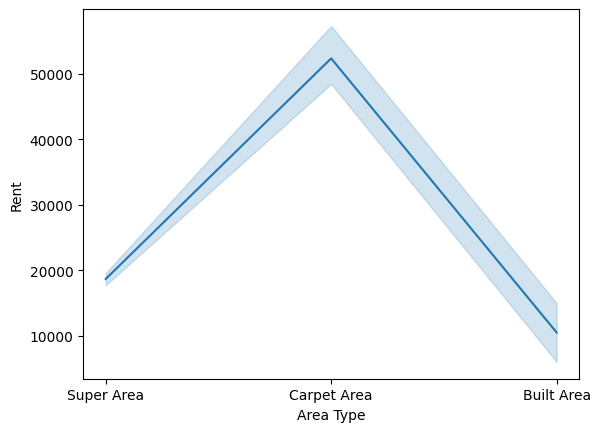

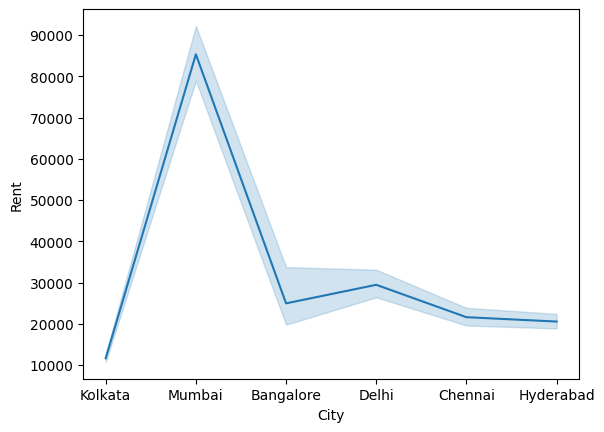

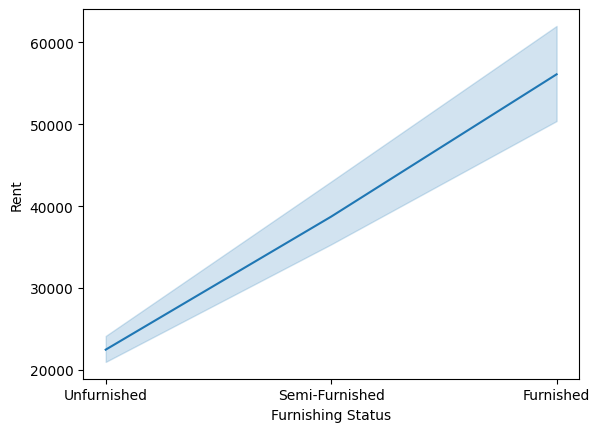

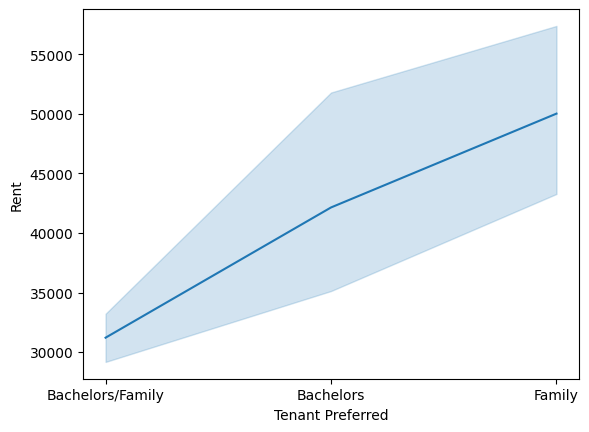

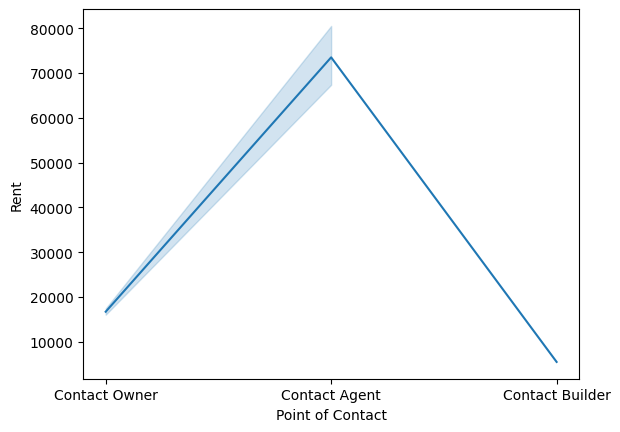

In [12]:
for col in categorical_col:
    if len(data[col].unique())>25:
        pass
    else:
        sns.lineplot(x=data[col], y=data['Rent'])
        plt.show()

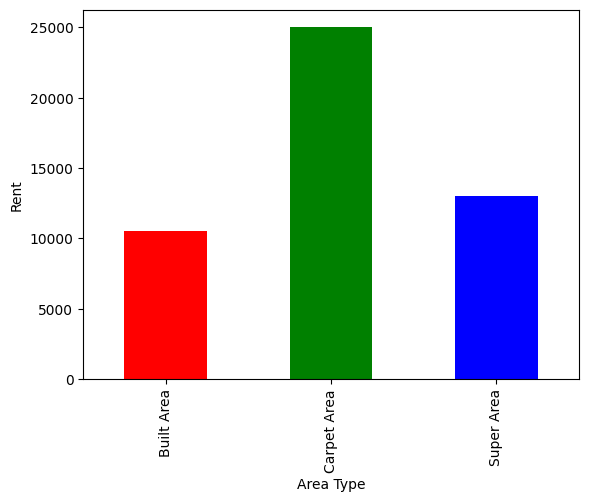

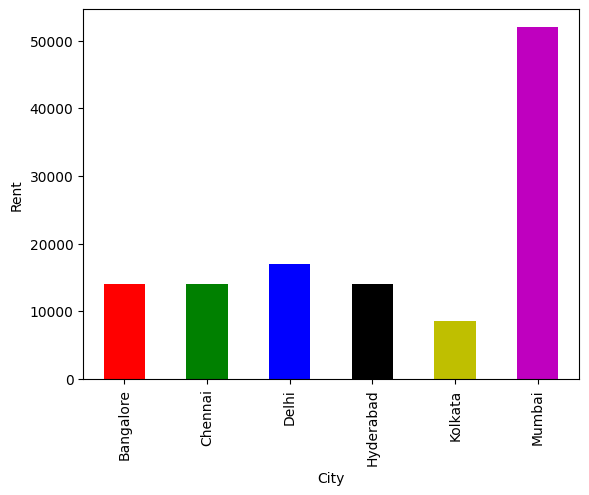

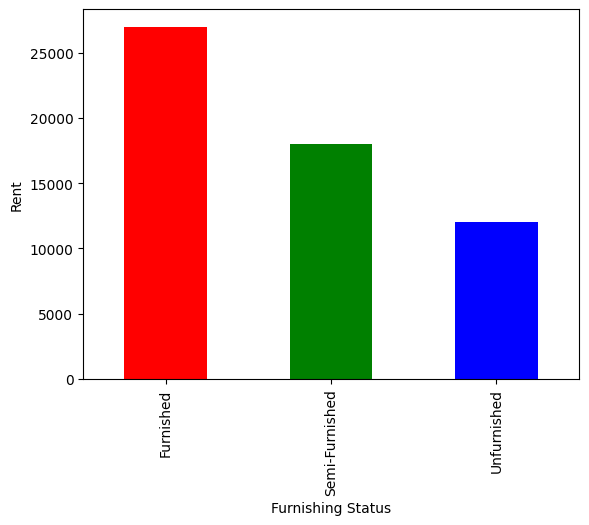

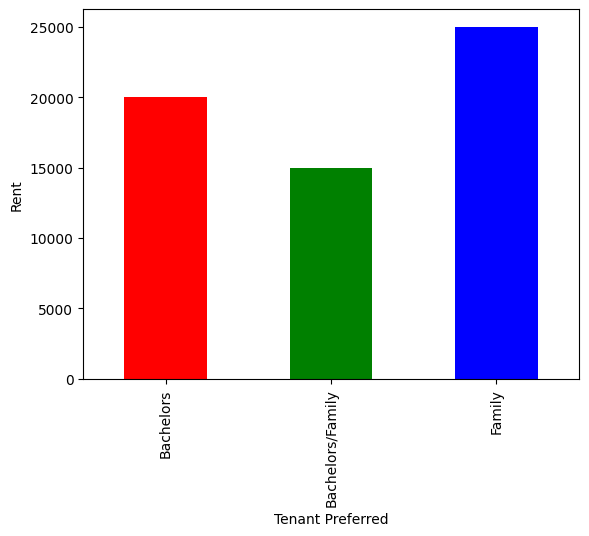

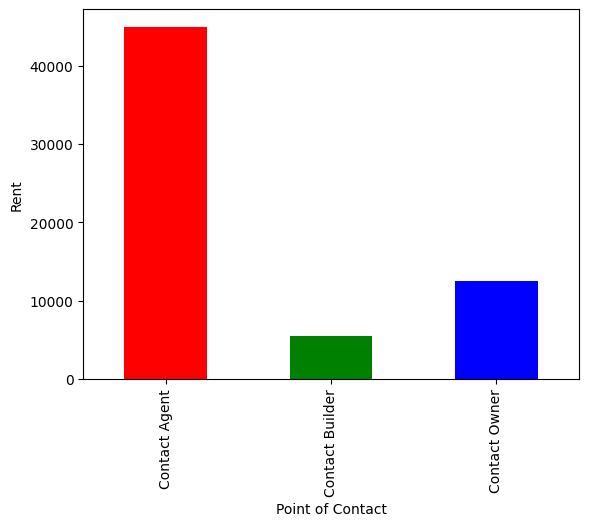

In [13]:
for col in categorical_col:
    if len(data[col].unique())>25:
        pass
    else:
        data1=data.copy()
        data1.groupby(col)['Rent'].median().plot.bar(color=list('rgbkymc'))
        plt.xlabel(col)
        plt.ylabel('Rent')
        plt.show()

Identifying the Outliers in Data

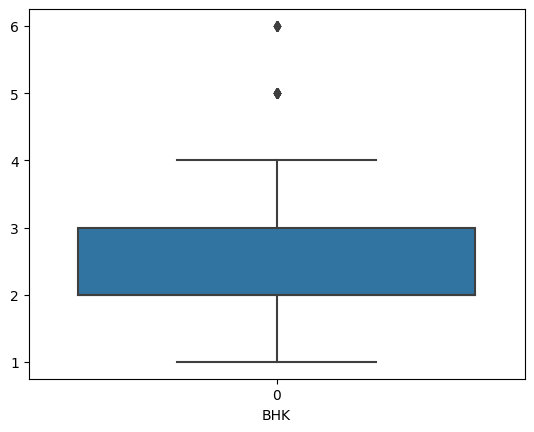

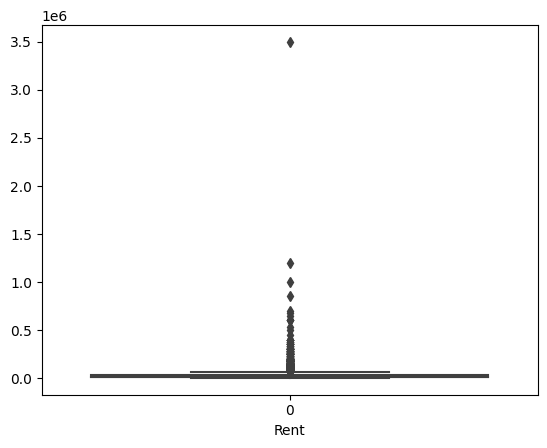

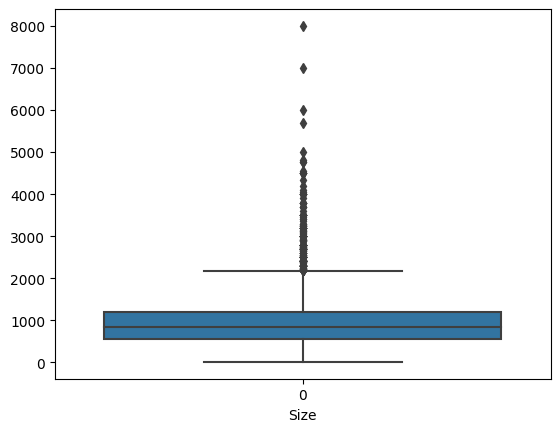

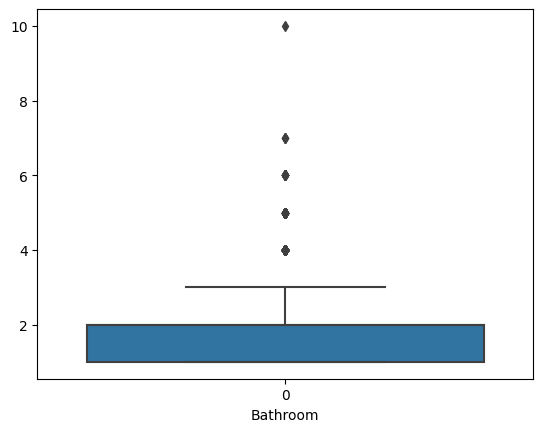

In [14]:
for col in numeric_col:
    sns.boxplot(data[col])
    plt.xlabel(col)
    plt.show()

Removing the outliers.

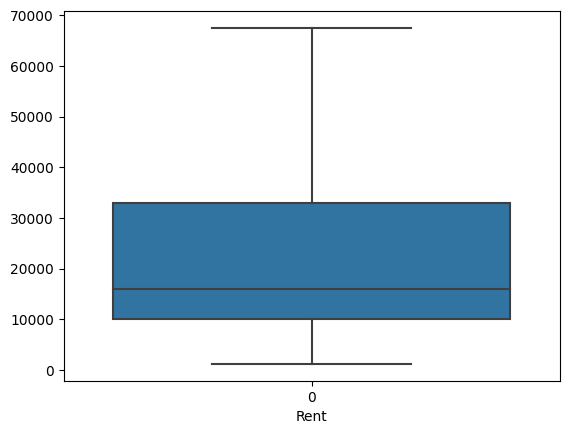

67500.0


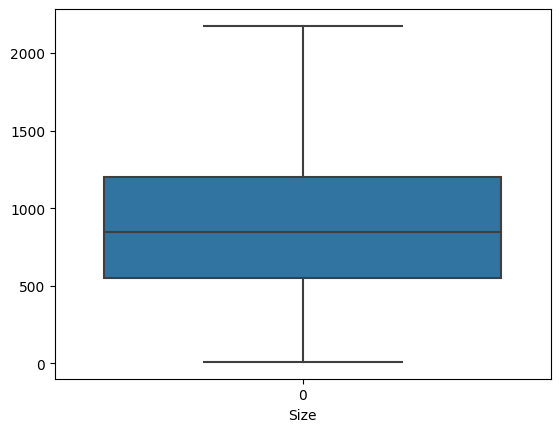

2175.0


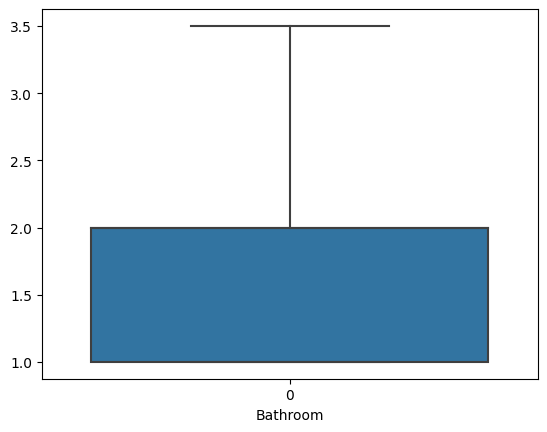

3.5


In [15]:
outliers_col=['Rent','Size','Bathroom']
for col in outliers_col:
    q1,q3= np.percentile(data[col],[25,75])
    IQR = q3-q1
    Upper_bound= q3 + (1.5 * IQR)
    Lower_bound= q1 - (1.5 * IQR)
    data.loc[(data[col]>Upper_bound),col] = Upper_bound
    sns.boxplot(data[col])
    plt.xlabel(col)
    plt.show()
    print(Upper_bound)

Removing categorical features with huge cardinality

In [16]:
data=data.drop(['Floor','Posted On','Area Locality'],axis=1)
data

,BHK,Rent,Size,Area Type,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2,10000,1100,Super Area,Kolkata,Unfurnished,Bachelors/Family,2.0,Contact Owner
1,2,20000,800,Super Area,Kolkata,Semi-Furnished,Bachelors/Family,1.0,Contact Owner
2,2,17000,1000,Super Area,Kolkata,Semi-Furnished,Bachelors/Family,1.0,Contact Owner
3,2,10000,800,Super Area,Kolkata,Unfurnished,Bachelors/Family,1.0,Contact Owner
4,2,7500,850,Carpet Area,Kolkata,Unfurnished,Bachelors,1.0,Contact Owner
...,...,...,...,...,...,...,...,...,...
4741,2,15000,1000,Carpet Area,Hyderabad,Semi-Furnished,Bachelors/Family,2.0,Contact Owner
4742,3,29000,2000,Super Area,Hyderabad,Semi-Furnished,Bachelors/Family,3.0,Contact Owner
4743,3,35000,1750,Carpet Area,Hyderabad,Semi-Furnished,Bachelors/Family,3.0,Contact Agent
4744,3,45000,1500,Carpet Area,Hyderabad,Semi-Furnished,Family,2.0,Contact Agent


In [17]:
categorical_cols=['Area Type','City','Furnishing Status','Tenant Preferred','Point of Contact']

Converting all the features to integer datatype.Numbering of categorical features is done on the basis of mean Rent for a given category.

In [18]:
for col in categorical_cols:
    label_orders=data.groupby(col)['Rent'].mean().index
    print(label_orders)
    label_orders ={k:i for i,k in enumerate(label_orders,0)}
    data[col]=data[col].map(label_orders)
data.head()

Index(['Built Area', 'Carpet Area', 'Super Area'], dtype='object', name='Area Type')
Index(['Bangalore', 'Chennai', 'Delhi', 'Hyderabad', 'Kolkata', 'Mumbai'], dtype='object', name='City')
Index(['Furnished', 'Semi-Furnished', 'Unfurnished'], dtype='object', name='Furnishing Status')
Index(['Bachelors', 'Bachelors/Family', 'Family'], dtype='object', name='Tenant Preferred')
Index(['Contact Agent', 'Contact Builder', 'Contact Owner'], dtype='object', name='Point of Contact')


,BHK,Rent,Size,Area Type,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2,10000,1100,2,4,2,1,2.0,2
1,2,20000,800,2,4,1,1,1.0,2
2,2,17000,1000,2,4,1,1,1.0,2
3,2,10000,800,2,4,2,1,1.0,2
4,2,7500,850,1,4,2,0,1.0,2


Feature Scaling

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4746 entries, 0 to 4745
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   BHK                4746 non-null   int64  
 1   Rent               4746 non-null   int64  
 2   Size               4746 non-null   int64  
 3   Area Type          4746 non-null   int64  
 4   City               4746 non-null   int64  
 5   Furnishing Status  4746 non-null   int64  
 6   Tenant Preferred   4746 non-null   int64  
 7   Bathroom           4746 non-null   float64
 8   Point of Contact   4746 non-null   int64  
dtypes: float64(1), int64(8)
memory usage: 333.8 KB


In [20]:
data['Bathroom']=data['Bathroom'].astype(int)

Splitting the training data and testing data

In [21]:
X=data.drop(['Rent'],axis=1)
Y=data['Rent']

In [22]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.33,random_state=0)

Defining a Random Forest Model

In [23]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [24]:
my_pipeline = Pipeline(steps=[('scaler', MinMaxScaler()), ('regressor', RandomForestRegressor())])

Predicting the rent for test dataset and then calculating mean_absolute_error, mean_squared_error and r2_score

In [25]:
my_pipeline.fit(X_train ,Y_train)

Pipeline(steps=[('scaler', MinMaxScaler()),
                ('regressor', RandomForestRegressor())])

In [26]:
y_pred=my_pipeline.predict(X_test)

In [27]:
print('MAE:', mean_absolute_error(Y_test, y_pred))
print('RMSE:', np.sqrt(mean_squared_error(Y_test, y_pred)))
print('R2 Score:', r2_score(Y_test, y_pred))

MAE: 5686.607736753087
RMSE: 8754.02688491848
R2 Score: 0.8061004100561624


In [28]:
import pickle

In [29]:
pickle.dump(my_pipeline,open('model3.pkl','wb'))

In [30]:
model=pickle.load(open('model3.pkl','rb'))